In [1]:
# Imports
import sys
import os 
import numpy as np
import pandas as pd
from astropy.visualization import hist

from spaxelsleuth.loaddata.lzifu import load_lzifu_galaxy
from spaxelsleuth.loaddata.sami import load_sami_galaxies
from spaxelsleuth.plotting.plot2dmap import plot2dmap
from spaxelsleuth.plotting.sdssimg import plot_sdss_image
from spaxelsleuth.plotting.plottools import plot_empty_BPT_diagram, plot_BPT_lines
from spaxelsleuth.plotting.plottools import vmin_fn, vmax_fn, label_fn, cmap_fn
from spaxelsleuth.plotting.plottools import component_colours
from spaxelsleuth.plotting.plotgalaxies import plot2dscatter, plot2dhistcontours

import matplotlib
from matplotlib import rc, rcParams
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

rc("text", usetex=False)
rc("font",**{"family": "serif", "size": 14})
rcParams["savefig.bbox"] = "tight"
rcParams["savefig.format"] = "pdf"
plt.ion()
plt.close("all")


In [2]:
# Options
fig_path = "/priv/meggs3/u5708159/SAMI/figs/individual_plots/"
savefigs = True
bin_type = "default"    # Options: "default" or "adaptive" for Voronoi binning
ncomponents = "recom"   # Options: "1" or "recom"


In [3]:
# Load the SAMI sample
df_sami = load_sami_galaxies(ncomponents="recom",
                             bin_type="default",
                             eline_SNR_min=5, 
                             vgrad_cut=False,
                             correct_extinction=False,
                             sigma_gas_SNR_cut=True)

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc,

In [4]:
# List all galaxies we have LZIFU data for
lzifu_data_path = "/priv/meggs3/u5708159/LZIFU/products/"
gals_lzifu = [int(f.split("_merge_lzcomp.fits")[0]) for f in os.listdir(lzifu_data_path) if f.endswith("merge_lzcomp.fits") and not f.startswith("._")]    
gals_shortlist = [64553, 106717, 30346, 41144, 609396, 9388000219, 144491, 106042, 240108, 184368, 8703, 544958, 460374, 537361, 144402, 204799, 463668, 85416, 463288, 511867, 24013, 561020, 144239, 298666, 288364, 176955, 84107, 585386, 99349, 287824, 610398, 551202, 240449, 55150, 69620, 534753, 14812, 545925, 105597, 3630097, 8353, 77754, 220439, 383318, 618116, 144051, 278548, 396833, 238358, 485834, 518782, 622744, 143814, 106376, 623432, 221375, 296829, 9091700139, 209698]
gals_good = [g for g in gals_shortlist if g in gals_lzifu]
_ = [print(g) for g in gals_good]


64553
106717
30346
41144
609396
9388000219
144491
106042
240108
184368
8703
544958
460374
537361
144402
204799
463668
85416
463288
511867
24013
561020
144239
298666
288364
176955
84107
585386
99349
287824
610398
551202
240449
55150
69620
534753
14812
545925
105597
3630097
8353
77754
220439
383318
618116
144051
278548
396833
238358
485834
518782
622744
143814
106376
623432
221375
296829
9091700139
209698


In [10]:
###########################################################################
# Select a galaxy and load the DataFrame
###########################################################################
gal = 388424
df_gal = df_sami[df_sami["ID"] == gal]
# df_gal = load_lzifu_galaxy(gal=gal, bin_type=bin_type, ncomponents=ncomponents,
#                        eline_SNR_min=5,
#                        sigma_gas_SNR_cut=True,
#                        vgrad_cut=False,
#                        stekin_cut=False)

df_gal.loc[df_gal["Number of components"] == 0, "Number of components"] = np.nan

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# Make a pretty plot for the proposal

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

# Axis 1: SDSS image
plot_sdss_image(df_gal, ax=axs[0])

# Axis 2: BPT classification 
plot2dmap(df_gal=df_gal, bin_type="default", survey="sami",
          PA_deg=0,
          col_z="BPT (numeric) (total)", 
          ax=axs[1], cax_orientation="horizontal", show_title=False)
axs[1].text(s=f"{gal}", x=0.9, y=0.9, horizontalalignment="right", verticalalignment="top", transform=axs[1].transAxes)

# Axis 3: Halpha, [NII] line profiles 
# Load the datacube
hdulist = fits.open(os.path.join(sami_datacube_path, f"ifs/{gal}/{gal}_A_cube_red.fits.gz"))

/home/u5708159/python/Modules/spaxelsleuth/plotting/plot2dmap.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gal["x, y (pixels)"] = list(zip(df_gal["x (projected, arcsec)"] / as_per_px, df_gal["y (projected, arcsec)"] / as_per_px))


NameError: name 'ax_im' is not defined

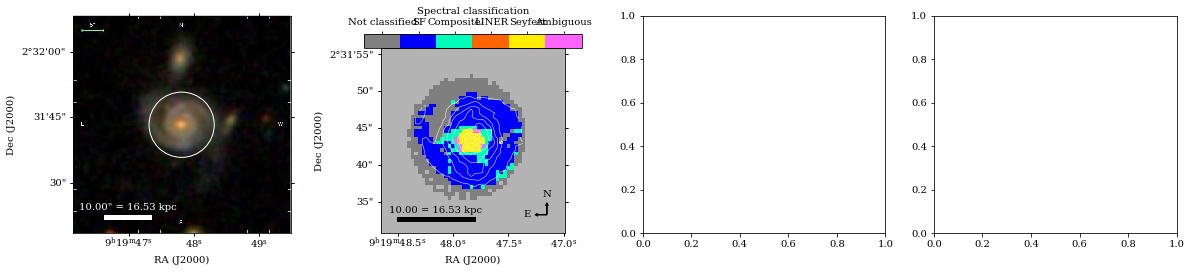

In [11]:
# Axis 4: Na D line profile 
###########################################################################
# Extract the spectrum from the red data cube 
###########################################################################
hdulist_R_cube = fits.open(os.path.join(sami_datacube_path, f"ifs/{gal}/{gal}_A_cube_red.fits.gz"))
header = hdulist_R_cube[0].header
data_cube_R = hdulist_R_cube[0].data
var_cube_R = hdulist_R_cube[1].data

# Get wavelength values 
z = df_snr.loc[gal, "z_spec"]
lambda_0_A = header["CRVAL3"] - header["CRPIX3"] * header["CDELT3"]
dlambda_A = header["CDELT3"]
N_lambda = header["NAXIS3"]
lambda_vals_A = np.array(range(N_lambda)) * dlambda_A + lambda_0_A 
lambda_rest_A = lambda_vals_A / (1 + z)

# Extract spectrum
spec = np.nansum(data_cube_R[:, mask], axis=1)
spec_err = np.sqrt(np.nansum(var_cube_R[:, mask], axis=1))
start = np.nanargmin(np.abs(lambda_rest_A - (5889 - 10)))
stop = np.nanargmin(np.abs(lambda_rest_A - (5896 + 10)))

# Divide by pixel area in arcsec2
spec /= mask_area_arcsec2
spec_err /= mask_area_arcsec2
